# Predicting Evergreeness of Content with Decision Trees and Random Forests

In [ ]:
## DATA DICTIONARY

In [40]:
import pandas as pd
import json
import seaborn as sns
%matplotlib inline

data = pd.read_csv("../../assets/dataset/stumbleupon.tsv", sep='\t')
data['title'] = data.boilerplate.map(lambda x: json.loads(x).get('title', ''))
data['body'] = data.boilerplate.map(lambda x: json.loads(x).get('body', ''))
dfs = data[data['label']==1]

## Predicting "Greenness" Of Content

This dataset comes from [stumbleupon](https://www.stumbleupon.com/), a web page recommender. A description of the columns is below:

FieldName|Type|Description
---------|----|-----------
url|string|Url of the webpage to be classified
title|string|Title of the article
body|string|Body text of article
urlid|integer| StumbleUpon's unique identifier for each url
boilerplate|json|Boilerplate text
alchemy_category|string|Alchemy category (per the publicly available Alchemy API found at www.alchemyapi.com)
alchemy_category_score|double|Alchemy category score (per the publicly available Alchemy API found at www.alchemyapi.com)
avglinksize| double|Average number of words in each link
commonlinkratio_1|double|# of links sharing at least 1 word with 1 other links / # of links
commonlinkratio_2|double|# of links sharing at least 1 word with 2 other links / # of links
commonlinkratio_3|double|# of links sharing at least 1 word with 3 other links / # of links
commonlinkratio_4|double|# of links sharing at least 1 word with 4 other links / # of links
compression_ratio|double|Compression achieved on this page via gzip (measure of redundancy)
embed_ratio|double|Count of number of <embed> usage
frameBased|integer (0 or 1)|A page is frame-based (1) if it has no body markup but have a frameset markup
frameTagRatio|double|Ratio of iframe markups over total number of markups
hasDomainLink|integer (0 or 1)|True (1) if it contains an <a> with an url with domain
html_ratio|double|Ratio of tags vs text in the page
image_ratio|double|Ratio of <img> tags vs text in the page
is_news|integer (0 or 1) | True (1) if StumbleUpon's news classifier determines that this webpage is news
lengthyLinkDomain| integer (0 or 1)|True (1) if at least 3 <a> 's text contains more than 30 alphanumeric characters
linkwordscore|double|Percentage of words on the page that are in hyperlink's text
news_front_page| integer (0 or 1)|True (1) if StumbleUpon's news classifier determines that this webpage is front-page news
non_markup_alphanum_characters|integer| Page's text's number of alphanumeric characters
numberOfLinks|integer Number of <a>|markups
numwords_in_url| double|Number of words in url
parametrizedLinkRatio|double|A link is parametrized if it's url contains parameters or has an attached onClick event
spelling_errors_ratio|double|Ratio of words not found in wiki (considered to be a spelling mistake)
label|integer (0 or 1)|User-determined label. Either evergreen (1) or non-evergreen (0); available for train.tsv only

### What are 'evergreen' sites?

> #### Evergreen sites are those that are always relevant.  As opposed to breaking news or current events, evergreen websites are relevant no matter the time or season. 

> #### A sample of URLs is below, where label = 1 are 'evergreen' websites

In [24]:
data[['url', 'label']].head()

,url,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,0
1,http://www.popsci.com/technology/article/2012-...,1
2,http://www.menshealth.com/health/flu-fighting-...,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,1
4,http://bleacherreport.com/articles/1205138-the...,0


### Exercises to Get Started

> ### Exercise: 1. In a group: Brainstorm 3 - 5 features you could develop that would be useful for predicting evergreen websites.
 ###  Exercise: 2. After looking at the dataset, can you model or quantify any of the characteristics you wanted?
- I.E. If you believe high-image content websites are likely to be evergreen, how can you build a feature that represents that?
- I.E. If you believe weather content is likely NOT to be evergreen, how might you build a feature that represents that?

### Split up and develop 1-3 of the those features independently.

In [41]:
data['is_news'].replace({'?':'0'}, inplace=True)

In [42]:
data.is_news = data.is_news.astype(int)

If we slice the data to states where a site is evergreen and news, more sites are news than not news.  So it is not necessarily the case that is_news is a good predictor of a site not being evergreen on its own.

In [31]:
data[data['label']==1].is_news.value_counts()

1    2353
0    1443
Name: is_news, dtype: int64

We might say that the number of words in the URL is a fairly decent predictor, if we set a threshold of < 13 words in the URL.

In [52]:
dfs.numwords_in_url.value_counts()

4     523
5     519
3     506
6     447
2     341
7     317
8     255
0     252
1     211
9     159
10    102
11     59
12     43
13     28
14     17
15      9
16      3
18      2
19      1
17      1
22      1
Name: numwords_in_url, dtype: int64

In [9]:
dfs_pred = data[(data['news_front_page']==0) | (data['is_news']==0) | (data['numwords_in_url']< 13)]
dfs_pred

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,title,body
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,24,0,5424,170,8,0.152941,0.079130,0,IBM Sees Holographic Calls Air Breathing Batte...,A sign stands outside the International Busine...
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,40,0,4973,187,9,0.181818,0.125448,1,The Fully Electronic Futuristic Starting Gun T...,And that can be carried on a plane without the...
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,55,0,2240,258,11,0.166667,0.057613,1,Fruits that Fight the Flu fruits that fight th...,Apples The most popular source of antioxidants...
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,24,0,2737,120,5,0.041667,0.100858,1,10 Foolproof Tips for Better Sleep,There was a period in my life when I had a lot...
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,14,0,12032,162,10,0.098765,0.082569,0,The 50 Coolest Jerseys You Didn t Know Existed...,Jersey sales is a curious business Whether you...
5,http://www.conveniencemedical.com/genital-herp...,7018,"{""url"":""conveniencemedical genital herpes home...",?,?,119.000000,0.745455,0.581818,0.290909,0.018182,...,12,?,4368,55,3,0.054545,0.087356,0,Genital Herpes Treatment,Genital herpes is caused by herpes simplex vir...
6,http://gofashionlane.blogspot.tw/2012/06/ameri...,8685,"{""title"":""fashion lane American Wild Child "",""...",arts_entertainment,0.22111,0.773810,0.215054,0.053763,0.043011,0.043011,...,21,0,1287,93,3,0.548387,0.064327,1,fashion lane American Wild Child,Our favorite summer holiday is just around the...
7,http://www.insidershealth.com/article/racing_f...,3402,"{""url"":""insidershealth article racing for reco...",?,?,1.883333,0.719697,0.265152,0.113636,0.015152,...,5,?,27656,132,4,0.068182,0.148551,0,Racing For Recovery by Dean Johnson racing for...,Racing For Recovery is the growing idea that d...
8,http://www.valetmag.com/the-handbook/features/...,477,"{""title"":""Valet The Handbook 31 Days 31 days"",...",?,?,0.471503,0.190722,0.036082,0.000000,0.000000,...,17,0,2471,194,7,0.644330,0.125000,1,Valet The Handbook 31 Days 31 days,Resolutions are for suckers Instead of swearin...
9,http://www.howsweeteats.com/2010/03/24/cookies...,6731,"{""url"":""howsweeteats 2010 03 24 cookies and cr...",?,?,2.410112,0.469325,0.101227,0.018405,0.003067,...,14,?,11459,326,4,0.236196,0.094412,1,Cookies and Cream Brownies How Sweet It Is,More brownies It seems that I can t get throug...


In [62]:
data.dtypes

url                                object
urlid                               int64
boilerplate                        object
alchemy_category                   object
alchemy_category_score             object
avglinksize                       float64
commonlinkratio_1                 float64
commonlinkratio_2                 float64
commonlinkratio_3                 float64
commonlinkratio_4                 float64
compression_ratio                 float64
embed_ratio                       float64
framebased                          int64
frameTagRatio                     float64
hasDomainLink                       int64
html_ratio                        float64
image_ratio                       float64
is_news                             int64
lengthyLinkDomain                   int64
linkwordscore                       int64
news_front_page                    object
non_markup_alphanum_characters      int64
numberOfLinks                       int64
numwords_in_url                   

> ### Exercise: 3. Does being a news site affect evergreeness? 
Compute or plot the percentage of news related evergreen sites.

So there is a roughly 50/50 split between 

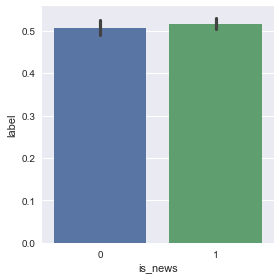

In [5]:
sns.factorplot(x='is_news', 
              y='label',
              kind='bar',
              data = data)

> ### Exercise: 4. Does category in general affect evergreeness? 
Plot the rate of evergreen sites for all Alchemy categories.

In [32]:
# ... #
data.groupby(['alchemy_category'])[['label']].mean()

,label
alchemy_category,
?,0.502135
arts_entertainment,0.371945
business,0.711364
computer_internet,0.246622
culture_politics,0.457726
gaming,0.368421
health,0.573123
law_crime,0.419355
recreation,0.684296


> ### Exercise: 5. How many articles are there per category?

In [33]:
data.groupby(['alchemy_category'])[['label']].count()

,label
alchemy_category,
?,2342
arts_entertainment,941
business,880
computer_internet,296
culture_politics,343
gaming,76
health,506
law_crime,31
recreation,1229


> #### Let's try extracting some of the text content.
> ### Exercise: 6. Create a feature for the title containing 'recipe'. 
Is the % of evegreen websites higher or lower on pages that have recipe in the the title?

In [48]:
data['recipe'] = data['title'].str.contains('recipe')

In [51]:
data['recipe'].value_counts()

False    7030
True      353
Name: recipe, dtype: int64

###  Let's Explore Some Decision Trees

 ### Demo: Build a decision tree model to predict the "evergreeness" of a given website. 

In [52]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

X = data[['image_ratio', 'html_ratio', 'recipe', 'label']].dropna()
y = X['label']
X.drop('label', axis=1, inplace=True)
    
    
# Fits the model
model.fit(X, y)

# Helper function to visualize Decision Trees (creates a file tree.png)

from sklearn.tree import export_graphviz
from os import system 
def build_tree_image(model):
    dotfile = open("tree.dot", 'w')
    export_graphviz(model,
                              out_file = dotfile,
                              feature_names = X.columns)
    dotfile.close()
    system("dot -Tpng tree.dot -o tree.png")
    
build_tree_image(model)

## Decision Trees in scikit-learn

 ### Exercise: Evaluate the decision tree using cross-validation; use AUC as the evaluation metric.

In [53]:
from sklearn.cross_validation import cross_val_score


/Users/patrickrhbrown/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [55]:
model_val = cross_val_score(model, X=X, y=y, scoring='roc_auc', cv=5, verbose=1)

model_val

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


array([ 0.53105433,  0.53137053,  0.55361566,  0.52836595,  0.55970116])

In [56]:
model_val_recall = cross_val_score(model, X=X, y=y, scoring='recall', cv=5, verbose=1)

model_val_recall

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


array([ 0.54808959,  0.52770449,  0.56728232,  0.53298153,  0.55936675])

###  Adjusting Decision Trees to Avoid Overfitting

 ### Demo: Control for overfitting in the decision model by adjusting the maximum number of questions (max_depth) or the minimum number of records in each final node (min_samples_leaf)

In [57]:
model = DecisionTreeClassifier(
                max_depth = 2,
                min_samples_leaf = 5)

model.fit(X, y)
build_tree_image(model)

 ### Demo: Build a random forest model to predict the evergreeness of a website. 

In [71]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 20)
    
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

### Demo: Extracting importance of features

In [72]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Features,Importance Score
1,html_ratio,0.527688
0,image_ratio,0.442406
2,recipe,0.029906


 ### Exercise: Evaluate the Random Forest model using cross-validation; increase the number of estimators and view how that improves predictive performance.

In [73]:
score = cross_val_score(model, X=X, y=y, scoring='roc_auc', cv=5, verbose=1, n_jobs=10)

score

for n_trees in range(1, 100, 5):
    model = RandomForestClassifier(n_estimators = n_trees)
    perf = cross_val_score(model, X, y, scoring='roc_auc')
    print('n trees: {}, CV AUC {}'.format(n_trees, perf))

[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:    0.7s finished


n trees: 1, CV AUC [ 0.54965753  0.52089546  0.52515096]
n trees: 6, CV AUC [ 0.55640829  0.55966789  0.5643007 ]
n trees: 11, CV AUC [ 0.56098409  0.58266348  0.57158302]
n trees: 16, CV AUC [ 0.57040842  0.58791824  0.58666096]
n trees: 21, CV AUC [ 0.55833595  0.58498402  0.5819236 ]
n trees: 26, CV AUC [ 0.57018257  0.5838981   0.58270048]
n trees: 31, CV AUC [ 0.5669982   0.59182106  0.57733969]
n trees: 36, CV AUC [ 0.5641602   0.58679829  0.58204994]
n trees: 41, CV AUC [ 0.5660314   0.58058054  0.57976427]
n trees: 46, CV AUC [ 0.57534512  0.58163308  0.58184687]
n trees: 51, CV AUC [ 0.56480639  0.58682208  0.58347274]
n trees: 56, CV AUC [ 0.56385445  0.58328343  0.57801207]
n trees: 61, CV AUC [ 0.56453431  0.5879579   0.58308876]
n trees: 66, CV AUC [ 0.57321208  0.58618758  0.58516971]
n trees: 71, CV AUC [ 0.5615682   0.59370175  0.58553516]
n trees: 76, CV AUC [ 0.56561107  0.58988915  0.58087552]
n trees: 81, CV AUC [ 0.57366312  0.58880224  0.5819537 ]
n trees: 86, CV 

##  Independent Practice: Evaluate Random Forest Using Cross-Validation

1. Continue adding input variables to the model that you think may be relevant
2. For each feature:
  - Evaluate the model for improved predictive performance using cross-validation
  - Evaluate the _importance_ of the feature
  - 
3. **Bonus**: Just like the 'recipe' feature, add in similar text features and evaluate their performance.


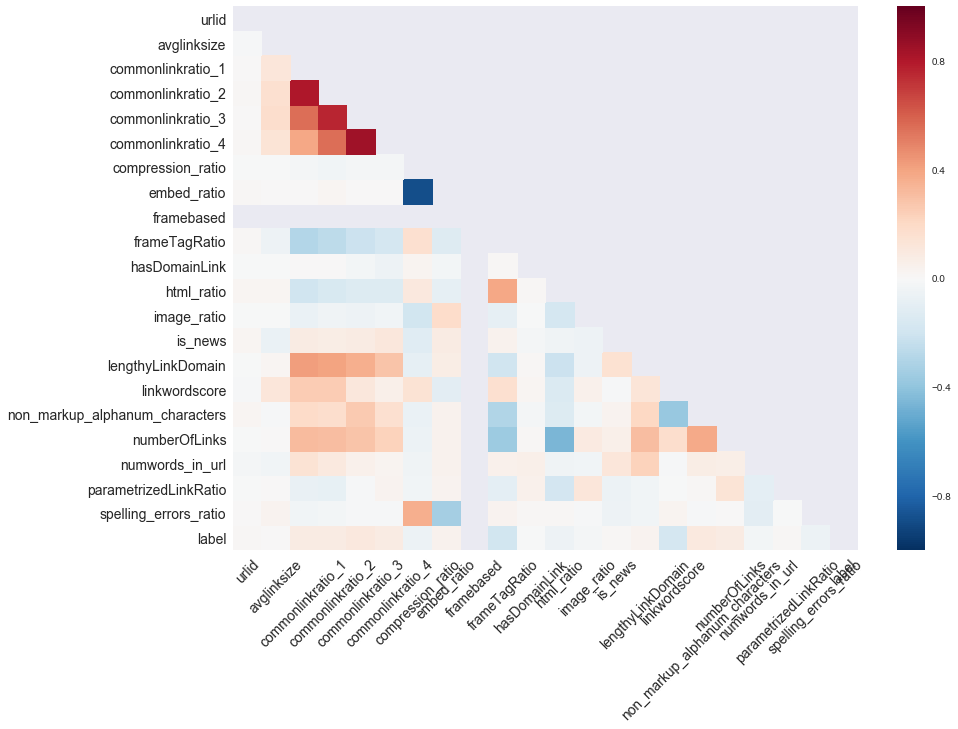

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

mean_corr = data.corr() #Set your correlation matrix.

# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(14,10))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(mean_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(mean_corr, mask=mask, ax=ax)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation = 45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation = 0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [ ]:
# ... #